# Implementing Gradient Descent for Linear Regression

#### Overview
- **Goal**: Train a linear regression model using the squared error cost function and gradient descent to fit a straight line through training data.

#### Components
- **Linear Regression Model**: Predicts outcomes based on input features.
- **Squared Error Cost Function**: Measures the model's prediction error.
- **Gradient Descent Algorithm**: Optimizes the model's parameters to minimize the cost function.

# Excercise

# Read Data

In [110]:
import numpy as np 
import pandas as pd

data = pd.read_csv('./Dataset.csv')

### Split Dataset

In [111]:
X_value = np.array(data[['X']])
y_value = np.array(data['y'])

SplitRatio = 0.7

X_train = X_value[:int(len(X_value) / 2 * SplitRatio)]
y_train = y_value[:int(len(y_value) / 2 * SplitRatio)]

X_test = X_value[int(len(X_value) / 2 * SplitRatio):]
y_test = y_value[int(len(y_value) / 2 * SplitRatio):]

print(X_train[0], y_train[0])
print(X_test[0], y_test[0])

[5.91013086] 4.714614608003876
[1.89087242] 2.905478374301235


### Algorithm function

In [112]:
class LinearRegression(): 
    def __init__(self, size_variable) -> None:
        self.learning_rate = 0.001
        self.W = np.ones(size_variable)
        self.b = 0.01
        
    def compute_cost(self, X, y):
        """
        Compute the cost function.
        
        Parameters:
        - X: Matrix of predictors, including the intercept.
        - y: Vector of the outcome variable.
        - W: Vector of linear regression weights
        - b: Bias of linear regression 
        
        Returns:
        - The cost using the current set of coefficients.
        """
        m = len(y)
        predictions = X.dot(self.W) + self.b
        cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
        return cost

    def gradient_descent(self, X, y, batch_size: int=10):
        """
        Perform gradient descent to learn theta.
        
        Parameters:
        - X: Matrix of predictors, including the intercept.
        - y: Vector of the outcome variable.
        - theta: Initial vector of coefficients (including intercept).
        - learning_rate: Learning rate.
        - iterations: Number of iterations.
        
        Returns:
        - The final coefficients and history of cost function values.
        """
        cost_history = []
        m = len(y)
        for epoch in range(batch_size):
            prediction = np.dot(X, self.W) + self.b
            self.W = self.W - (1/m) * self.learning_rate * 1/m * np.dot(X.T, (prediction - y))
            self.b = self.b - (1/m) * self.learning_rate * 1/m * np.sum(prediction - y)
            current_cost = self.compute_cost(X, y)
            cost_history.append(current_cost)
            
        return cost_history

# Train Model

In [113]:
algorithm = LinearRegression(len(X_train[0]))
cost_result = algorithm.gradient_descent(X_train, y_train, 100000)

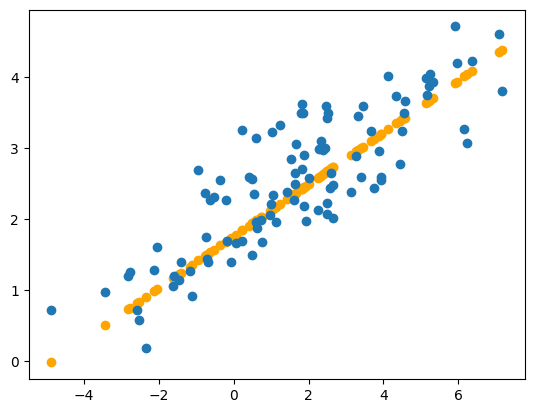

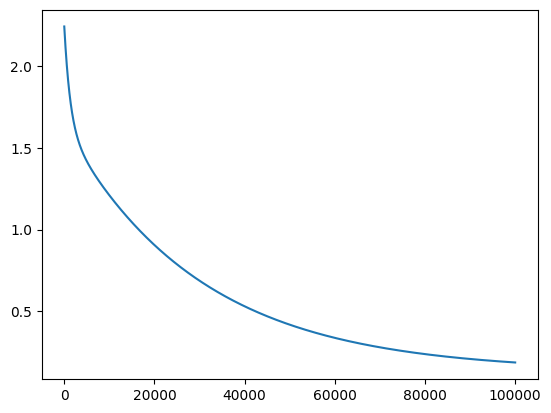

In [114]:
import matplotlib.pyplot as plt
y_predict = X_value.dot(algorithm.W) + algorithm.b
plt.scatter(X_value, y_predict, color='orange', '-')
plt.scatter(X_value, y_value)
plt.show()
plt.plot(cost_result)